In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
x = tf.placeholder(tf.float32, [None, 5])
w = tf.Variable(tf.zeros([5,1]))
y = tf.matmul(x, w)
t = tf.placeholder(tf.float32, [None, 1])
loss = tf.reduce_sum(tf.square(y-t))
train_step = tf.train.AdamOptimizer().minimize(loss)

In [3]:
sess = tf.Session()
sess.run(tf.initialize_all_variables())
train_t = np.array([5.2, 5.7, 8.6, 14.9, 18.2, 20.4, 
                   25.5, 26.4, 22.8, 17.5, 11.1, 6.6])
train_t = train_t.reshape([12,1])

train_x = np.zeros([12,5])
for row, month in enumerate(range(1,13)):
    for col, n in enumerate(range(0,5)):
        train_x[row][col] = month**n

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [4]:
i = 0
for _ in range(100000):
    i += 1
    sess.run(train_step, feed_dict = {x:train_x, t:train_t})
    if i % 10000 == 0:
        loss_val = sess.run(loss, feed_dict={x:train_x, t:train_t})
        print('Step: %d, Loss: %f' % (i, loss_val))

Step: 10000, Loss: 31.014380
Step: 20000, Loss: 29.290693
Step: 30000, Loss: 28.022751
Step: 40000, Loss: 27.663746
Step: 50000, Loss: 25.792316
Step: 60000, Loss: 24.766474
Step: 70000, Loss: 23.838539
Step: 80000, Loss: 22.974419
Step: 90000, Loss: 22.176279
Step: 100000, Loss: 22.416885


In [5]:
i = 0
for _ in range(100000):
    i += 1
    sess.run(train_step, feed_dict = {x:train_x, t:train_t})
    if i % 10000 == 0:
        loss_val = sess.run(loss, feed_dict={x:train_x, t:train_t})
        print('Step: %d, Loss: %f' % (i, loss_val))

Step: 10000, Loss: 20.752411
Step: 20000, Loss: 20.116020
Step: 30000, Loss: 22.806179
Step: 40000, Loss: 22.287575
Step: 50000, Loss: 18.477936
Step: 60000, Loss: 18.011114
Step: 70000, Loss: 17.577477
Step: 80000, Loss: 19.282192
Step: 90000, Loss: 16.803900
Step: 100000, Loss: 16.459364


In [6]:
w_val = sess.run(w)
print(w_val)

[[ 6.1078525 ]
 [-4.0437627 ]
 [ 2.5110292 ]
 [-0.2817462 ]
 [ 0.00835047]]


In [7]:
def predict(x):
    result = 0.0
    for n in range(0,5):
        result += w_val[n][0] * x**n
        return result

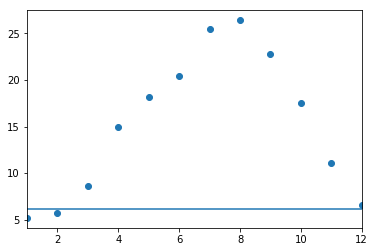

In [8]:
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.set_xlim(1,12)
subplot.scatter(range(1,13), train_t)
linex = np.linspace(1,12,100)
liney = predict(linex)
subplot.plot(linex, liney)